# 1. Cargar los datos

#### Importamos librerías

In [119]:
# Importamos librerías a utilizar en esta sección
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

#### Importamos los datos

In [120]:
# URL "raw" del archivo CSV en GitHub
csv_url = "https://raw.githubusercontent.com/josemal98/Proyecto_ML_BEDU/main/Data/heart.csv"

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(csv_url)

# Ahora puedes trabajar con el DataFrame
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Descripción de nuestras variables:

VARIABLE DEPENDIENTE

*Variable dependiente categórica binaria*

- **HeartDisease:** Enfermedad cardiaca (1: heart disease, 0: Normal).

    
VARIABLES EXPLICATIVAS

*Variables numéricas*

- **Age:** Edad del paciente (años).

- **RestingBP:** Presión arterial en reposo (mm Hg).

- **Cholesterol:** Colesterol sérico (mm/dl).

- **FastingBS:** Nivel de azúcar en la sangre en ayunas (1: if FastingBS > 120 mg/dl, 0: otherwise).

- **MaxHR:** Frecuencia cardiaca máxima (valores entre 60-202).

- **Oldpeak:** Valor numérico de depresión (ST) inducido por el ejercicio relacionado al reposo. (Representa una caída de la curva ST).


*Variables categóricas*

- **Sex:** Género del paciente (M: Male, F: Female).

- **ChestPainType:** Tipo de dolor en el pecho (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic).

- **RestingECG:** Actividad eléctrica del corazón (ECG o electrocardiograma) en reposo [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes’criteria].

- **ExerciseAngina:** Dolor en el pecho al ejercitarse (Y: Yes, N: No).

- **ST_Slope:** Pendiente del segmento ST en ejercicio máximo (Up: ascendente / Flat: plana / Down: descendente).


#### Dimensión de nuestros datos

In [121]:
# Dimensión de nuestros datos
print(f"Dimensión de los datos: {df.shape}\n")

Dimensión de los datos: (918, 12)



#### Tipo de dato de cada una de nuestras variables

In [122]:
# Tipo de dato de cada variable
print(f"Tipo de dato de cada variable:\n {df.dtypes}\n")

Tipo de dato de cada variable:
 Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object



#### Cantidad de valores perdidos

In [123]:
# Valores faltantes
print(f"Valores faltantes:\n {df.isna().sum()}")

Valores faltantes:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


#### Cantidad de filas repetidas

In [124]:
# Filas repetidas
print(f"Cantidad de filas repetidas: {df.duplicated().sum()}")

Cantidad de filas repetidas: 0


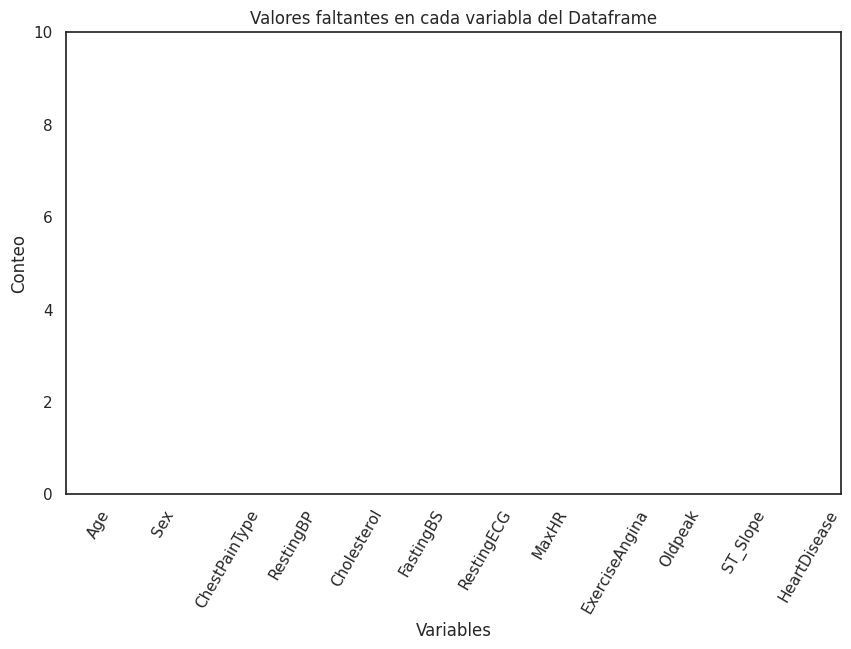

In [125]:

# Configura el estilo de Seaborn
sns.set(style="white")

# Calcula la cantidad de valores faltantes en cada variable
missing_values = df.isna().sum()

# Crea la gráfica de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xlabel('Variables')
plt.ylabel('Conteo')
plt.xticks(rotation=60)  # Rotar las etiquetas del eje x para que sean legibles
plt.title('Valores faltantes en cada variabla del Dataframe')

# Establece los límites del eje y de 0 a 10
plt.ylim(0, 10)

plt.show()


#### Analizamos el balance de las categorías de nuestra variable objetivo.

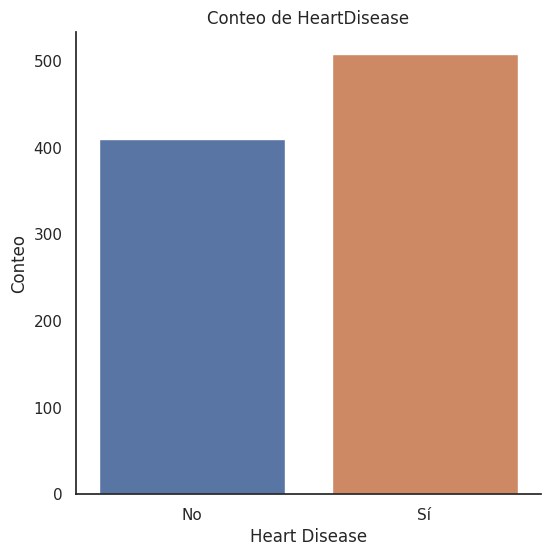

In [126]:
# Configura el estilo de Seaborn
sns.set(style="white")

# Crea la figura para la gráfica de barras de 'HeartDisease' sin bordes
plt.figure(figsize=(6, 6))

# Grafica la gráfica de barras de 'HeartDisease'
sns.countplot(data=df, x="HeartDisease")
plt.xlabel('Heart Disease')
plt.ylabel('Conteo')
plt.xticks([0, 1], ['No', 'Sí'])
plt.title('Conteo de HeartDisease')

# Elimina los bordes del eje
sns.despine()

# Mostrar la figura
plt.show()


#### Analizamos nuestras variables categóricas con respecto a la variable objetivo.

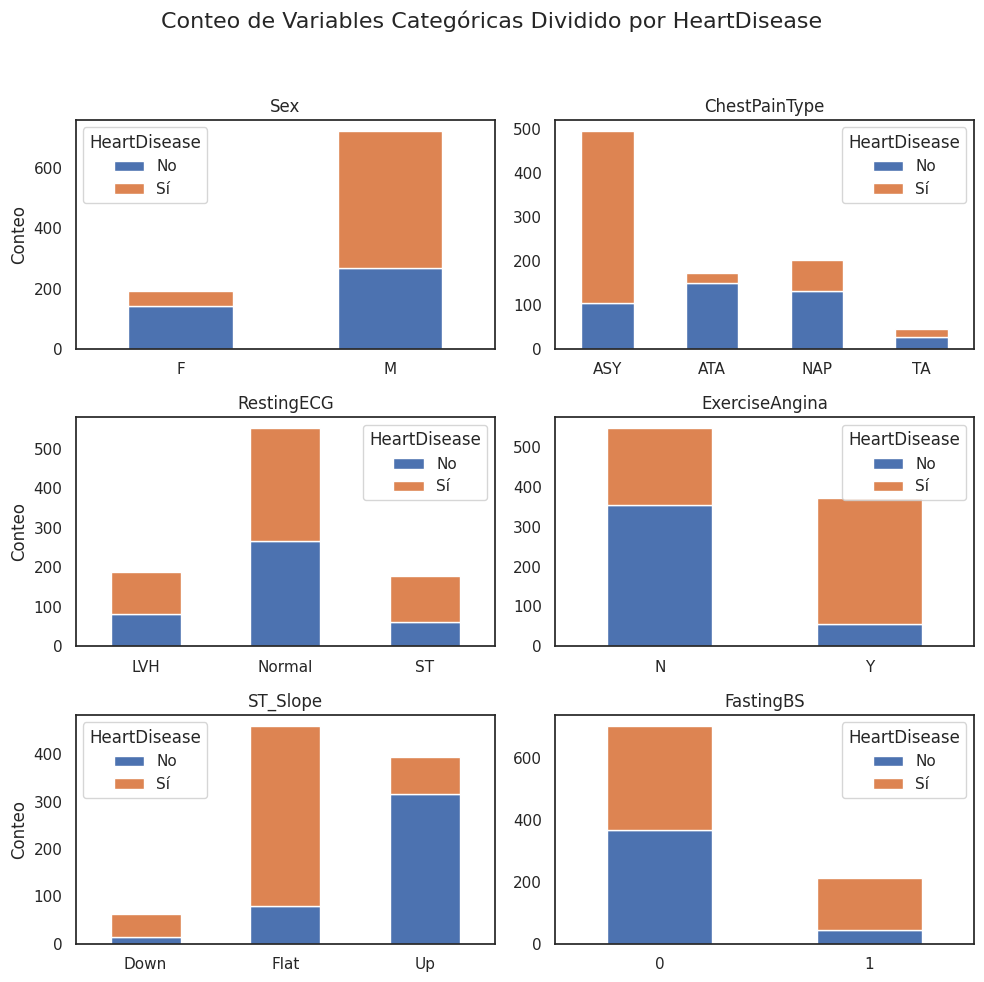

In [128]:
# Configura el estilo de Seaborn en "darkgrid"
sns.set_style("white")

# Definir las columnas categóricas
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS']

# Configurar la figura y los subplots
num_rows = 3
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
fig.subplots_adjust(wspace=0.5, hspace=0.5)  # Ajustar el espacio entre subplots
axes = axes.reshape(-1)

# Iterar a través de las columnas categóricas y crear gráficas de barras apiladas por la variable objetivo
for i, column in enumerate(categorical_columns):
    # Dividir los datos por HeartDisease y contar las frecuencias para cada categoría
    grouped = df.groupby([column, 'HeartDisease']).size().unstack()

    # Crear un gráfico de barras apiladas
    ax = grouped.plot(kind='bar', stacked=True, ax=axes[i])
    ax.set_xlabel('')
    if i % 2 == 0:
        ax.set_ylabel('Conteo')
    else:
        ax.set_ylabel('')
    ax.set_title(column)

    # Desactivar la rotación de los x-labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

    # Personalizar la leyenda
    ax.legend(title='HeartDisease', labels=['No', 'Sí'])

# Eliminar los subplots vacíos si hay menos de 6 variables categóricas
if len(categorical_columns) < num_rows * num_cols:
    for i in range(len(categorical_columns), num_rows * num_cols):
        fig.delaxes(axes[i])

# Agregar un título general a la figura
plt.suptitle('Conteo de Variables Categóricas Dividido por HeartDisease', fontsize=16)

# Ajustar el espaciado entre subplots
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Mostrar la figura
plt.show()


#### Estadísticos básicos de nuestras variables numericas.


In [129]:
# Lista de columnas numéricas
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Estadísticos de las variables numericas
df[numerical_columns].describe().round(2)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,136.81,0.89
std,9.43,18.51,109.38,25.46,1.07
min,28.00,0.00,0.00,60.00,-2.60
25%,47.00,120.00,173.25,120.00,0.00
50%,54.00,130.00,223.00,138.00,0.60
75%,60.00,140.00,267.00,156.00,1.50
max,77.00,200.00,603.00,202.00,6.20


#### Analizamos nuestras variables numéricas con respecto a la variable objetivo.

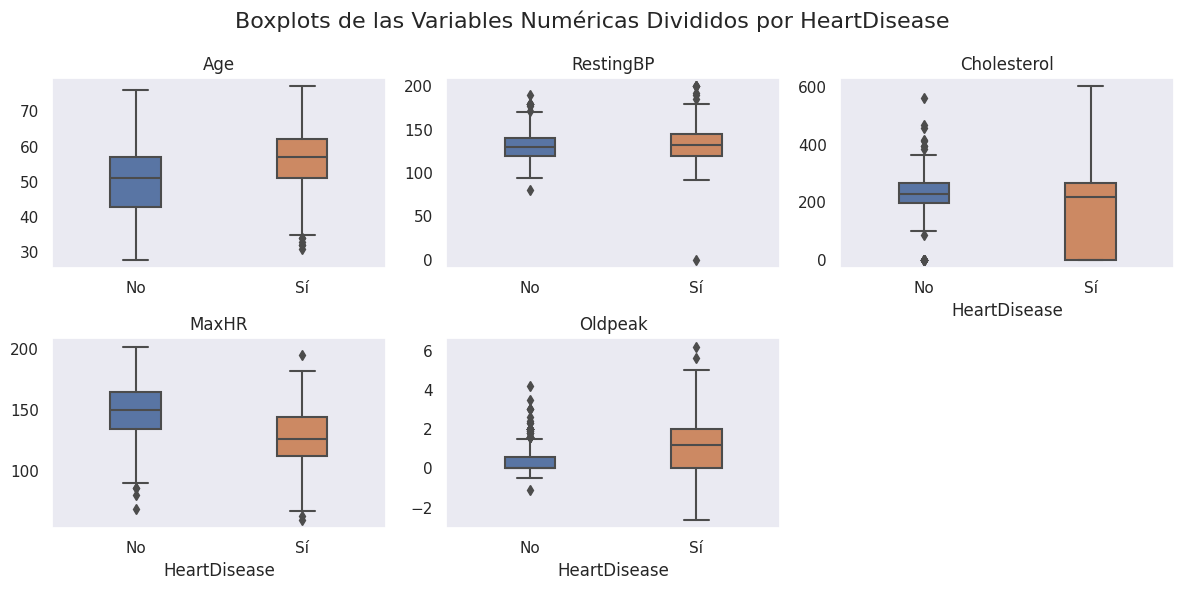

In [131]:
sns.set_style("dark")

# Configurar la figura y los subplots
num_rows = 2
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))
fig.subplots_adjust(wspace=0.5)  # Ajusta el espacio entre subplots

# Asegurarse de que 'axes' sea una matriz 2D
axes = axes.reshape(-1)

# Iterar a través de las columnas numéricas y crear boxplots divididos por HeartDisease
for i, column in enumerate(numerical_columns):
    sns.boxplot(data=df, x='HeartDisease', y=column, ax=axes[i], width=0.3)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].set_xticklabels(['No', 'Sí'])  # Cambiar las etiquetas del eje x

# Eliminar la subgráfica vacía correspondiente a la variable FastingBS
fig.delaxes(axes[-1])

# Agregar un título general a la figura
fig.suptitle('Boxplots de las Variables Numéricas Divididos por HeartDisease', fontsize=16)

axes[2].set_xlabel('HeartDisease')
axes[3].set_xlabel('HeartDisease')
axes[4].set_xlabel('HeartDisease')

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()


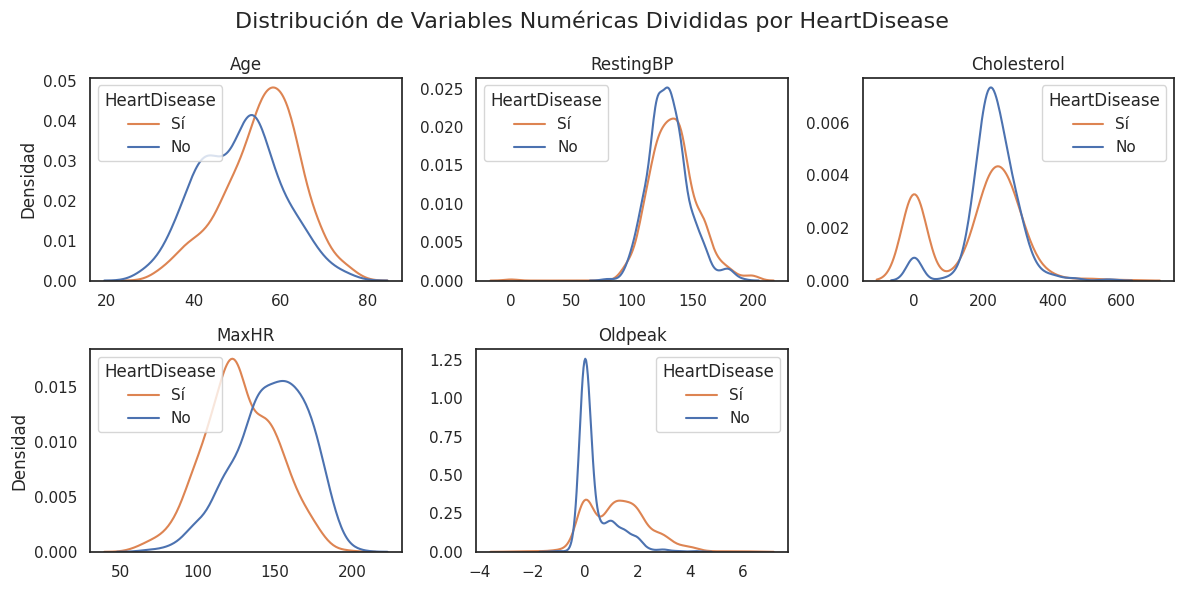

In [132]:
# Configura el estilo de Seaborn en "darkgrid"
sns.set_style("white")

# Configurar la figura y los subplots
num_rows = 2
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))
fig.subplots_adjust(wspace=0.5)  # Ajusta el espacio entre subplots

# Asegurarse de que 'axes' sea una matriz 2D
axes = axes.reshape(-1)

# Iterar a través de las columnas numéricas y crear gráficos de densidad (KDE) divididos por HeartDisease
for i, column in enumerate(numerical_columns):
    sns.kdeplot(data=df, x=column, hue='HeartDisease', ax=axes[i], common_norm=False)
    axes[i].set_title(column)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Densidad')

    # Personalizar la leyenda
    axes[i].legend(title='HeartDisease', labels=['Sí', 'No'])

# Eliminar la subgráfica vacía correspondiente a la variable FastingBS
fig.delaxes(axes[-1])

# Eliminamos los ylabels
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[4].set_ylabel('')

# Agregar un título general a la figura
fig.suptitle('Distribución de Variables Numéricas Divididas por HeartDisease', fontsize=16)

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()


#### Correlación entre todas las variables de nuestro Dataframe.

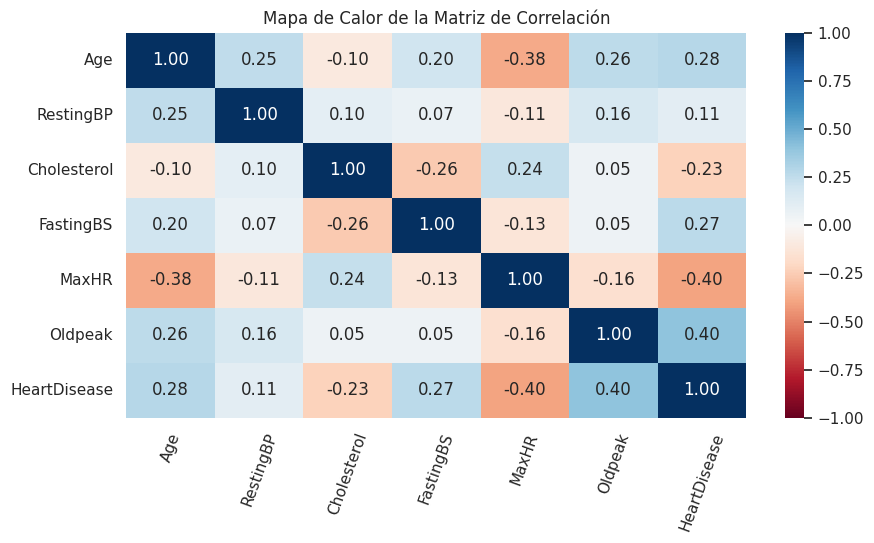

In [133]:
# Calcula la matriz de correlación
correlation_matrix = df.corr()

# Configura el estilo del mapa de calor
sns.set(style="white")

# Crea un mapa de calor de la matriz de correlación
plt.figure(figsize = (10,5))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="RdBu", fmt=".2f", vmin=-1, vmax=1)
plt.title('Mapa de Calor de la Matriz de Correlación')
# Rotar los labels del eje x a 90 grados
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=70)
plt.show()

# 3. Preparación de los datos

In [134]:
# Importamos librerías a utilizar en esta sección
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

#### Algo que notamos en el análisis exploratorio es que la variable Cholesterol tiene muchos valores 0, probablemente añadidos para reemplazar a los datos faltantes.

In [135]:
print(f"Valores 0 en la variable Cholesterol: {sum(df.Cholesterol == 0)}")

Valores 0 en la variable Cholesterol: 172


Además, notamos que las distribuciones de Cholesterol están bastante solapadas y por ende no es informativa con respecto a la variable objetivo. Con base en esto, decidimos eliminar esta columna.

In [136]:
# Eliminamos la columna Cholesterol
df_drop = df.drop('Cholesterol', axis=1)

#### Eliminación de outliers empleando el criterio de 1.5 veces el rango intercuartílico

In [137]:
# Creamos una copia de df_transformed
df_clean = df_drop.copy()

# Lista de columnas numéricas sin Cholesterol
numerical_columns = ['Age', 'RestingBP', 'MaxHR', 'Oldpeak']

# Itera sobre las columnas numéricas y elimina los outliers
for column in numerical_columns:
    Q1 = df_drop[column].quantile(0.25)
    Q3 = df_drop[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtra los valores que no son outliers
    df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]


# Calculamos la cantidad de outliers eliminados
print(f"Cantidad de outliers detectados: {len(df_drop) - len(df_clean)}")

Cantidad de outliers detectados: 44


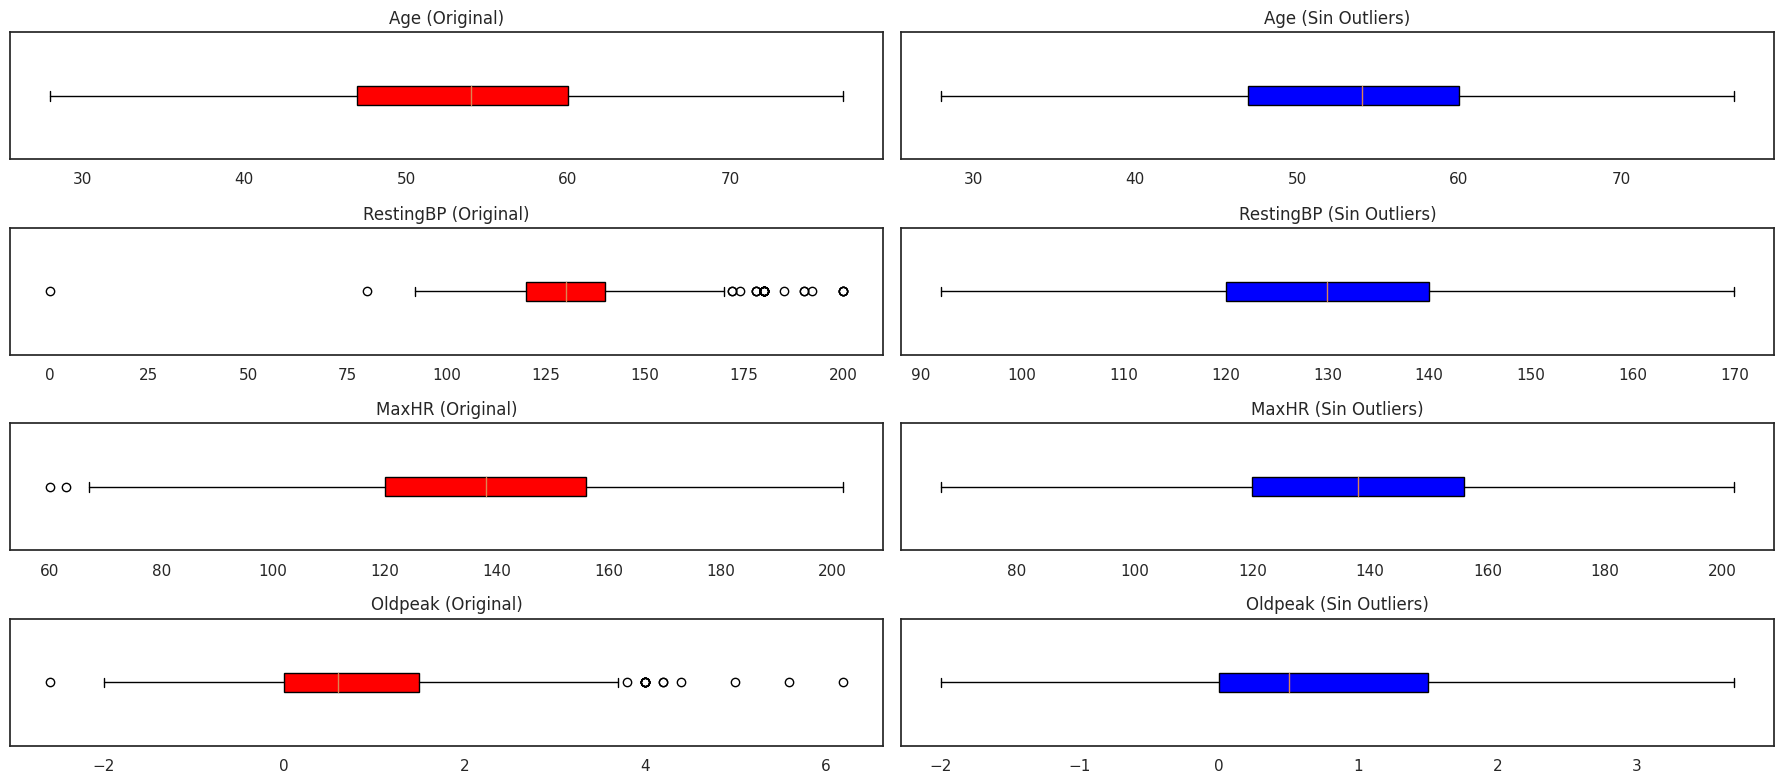

In [139]:

# Configurar la figura y los subplots con orientación horizontal
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 8))

# Iterar a través de las columnas numéricas y crear boxplots horizontales
for i, column in enumerate(numerical_columns):
    # Boxplot original en rojo con relleno rojo
    axes[i, 0].boxplot(df[column], vert=False, patch_artist=True, boxprops=dict(facecolor='red'))
    axes[i, 0].set_title(f'{column} (Original)')

    # Boxplot sin outliers en azul con relleno azul
    axes[i, 1].boxplot(df_clean[column], vert=False, patch_artist=True, boxprops=dict(facecolor='blue'))
    axes[i, 1].set_title(f'{column} (Sin Outliers)')

    # Eliminar las etiquetas en la columna de la derecha
    axes[i, 0].set_yticklabels([])
    axes[i, 1].set_yticklabels([])

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

#### Conversión de variables categóricas a numéricas.

In [140]:
# Definir las columnas categóricas sin incluir FastingBS
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
# Utiliza get_dummies para convertir las columnas categóricas en variables numéricas
df_trans = pd.get_dummies(df_clean, columns=categorical_columns)

# Inspeccionamos el nuevo dataframe
df_trans.head()

,Age,RestingBP,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,0,172,0.0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,0,156,1.0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,0,98,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,0,108,1.5,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,0,122,0.0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


Con esto podemos re-calcular la matriz de correlación ahora para todas nuestras variables.

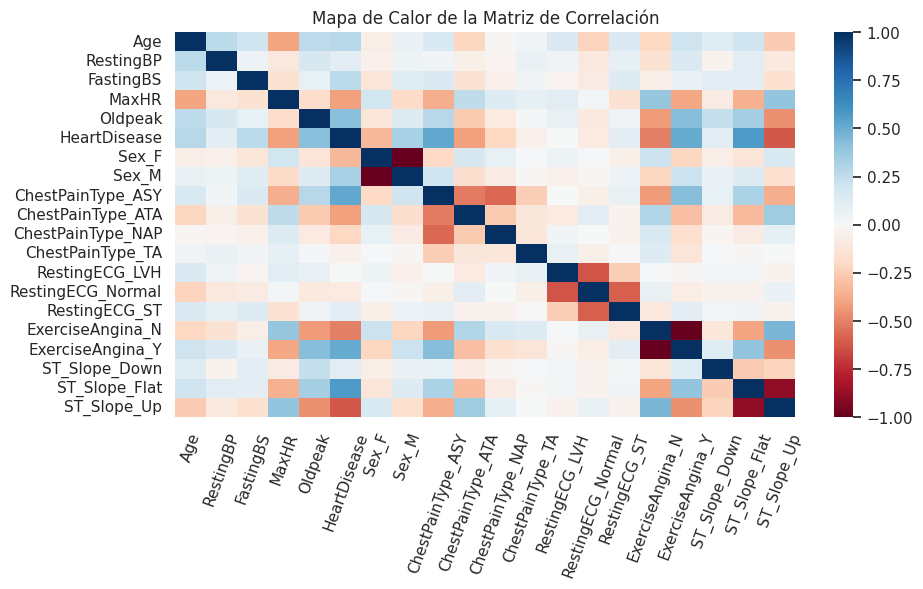

In [141]:
# Calcula la matriz de correlación
correlation_matrix = df_trans.corr()

# Configura el estilo del mapa de calor
sns.set(style="white")

# Crea un mapa de calor de la matriz de correlación
plt.figure(figsize = (10,5))
heatmap = sns.heatmap(correlation_matrix, cmap="RdBu", fmt=".01f", vmin=-1, vmax=1)
plt.title('Mapa de Calor de la Matriz de Correlación')
# Rotar los labels del eje x a 90 grados
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=70)
plt.show()

#### Estandarización de variables numéricas.

In [142]:
# Creamos objeto para estandarizar
scale = MinMaxScaler()
# Todas las columnas excepto las binarias:
col = ['Age', 'RestingBP', 'MaxHR', 'Oldpeak']
# Crear copia de df_trans
df_std = df_trans.copy()
# Estandarizamos
df_std[col] = scale.fit_transform(df_trans[col])
# Inspeccionamos primeros elementos
df_std.head()

,Age,RestingBP,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.615385,0,0.777778,0.350877,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0.428571,0.871795,0,0.659259,0.526316,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,0.183673,0.487179,0,0.229630,0.350877,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,0.408163,0.589744,0,0.303704,0.614035,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0.530612,0.743590,0,0.407407,0.350877,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


# 4. Selección y entrenamiento de modelos

In [143]:
# Importamos librerías a utilizar en esta sección

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix, recall_score, precision_score, classification_report
from sklearn.metrics import average_precision_score

# ---------------------------------------------------------
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split

# ---------------------------------------------------------
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [144]:
# Para que no se desplieguen las advertencias
import warnings
warnings.filterwarnings("ignore")

#### Conjuntos de entrenamiento y validación

In [145]:
# Separar variables dependientes e independientes
x = df_std.drop("HeartDisease", axis = 1)
y = df_std['HeartDisease']

In [146]:
# Crear conjuntos de entrenamiento y validación
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state =100 ,stratify=y, test_size = 0.2)
print(f"Cantidad de datos en el conjunto de entrenamiento (80%): {len(x_train)}")
print(f"Cantidad de datos en el conjunto de validación (20%): {len(y_test)}")
print(f"\nCantidad de datos de cada categoría en el conjunto de validación: \n{y_test.value_counts()}")


Cantidad de datos en el conjunto de entrenamiento (80%): 699
Cantidad de datos en el conjunto de validación (20%): 175

Cantidad de datos de cada categoría en el conjunto de validación: 
1    95
0    80
Name: HeartDisease, dtype: int64


#### Selección de características

In [147]:
# Seleccionamos las características más informativas con base en accuracy
sfs = SFS(GradientBoostingClassifier(n_estimators=100, random_state=0),
          k_features = 7,
          forward= True,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1).fit(x_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed:    6.3s finished

[2023-10-12 03:26:07] Features: 1/7 -- score: 0.8097208538587849[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    5.0s finished

[2023-10-12 03:26:12] Features: 2/7 -- score: 0.8097208538587849[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed:    6.3s finished

[2023-10-12 03:26:18] Features: 3/7 -- score: 0.8326190476190477[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    5.1s finished

[2023-10-12 03:26:23] Features: 4/7 -- score: 0.8497865353037767[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    6.6s finished

[202

In [107]:
# Inspeccionar las características más informativas
print("Mejores características: ",sfs.k_feature_names_)
# El mayor accuracy obtenido
print("Mejor accuracy: ",sfs.k_score_)

Mejores características:  ('MaxHR', 'Oldpeak', 'Sex_F', 'ChestPainType_ASY', 'RestingECG_ST', 'ExerciseAngina_N', 'ST_Slope_Up')
Mejor accuracy:  0.8569950738916257


In [148]:
# Re-definir conjunto de entrenamiento solo con las características más informativas
x_train_new = x_train[['MaxHR', 'Oldpeak', 'Sex_F', 'ChestPainType_ASY', 'RestingECG_ST', 'ExerciseAngina_N', 'ST_Slope_Up']]
x_test_new = x_test[['MaxHR', 'Oldpeak', 'Sex_F', 'ChestPainType_ASY', 'RestingECG_ST', 'ExerciseAngina_N', 'ST_Slope_Up']]

#### Entrenamiento de modelos

Para entender esta sección, a continuación se ofrece una breve descripción de las métricas utilizadas para medir el desempeño de un modelo:

<br>

La construcción de una matriz de confusión se fundamenta en tres componentes principales: verdaderos positivos (VP), verdaderos negativos (VN), falsos positivos (FP) y falsos negativos (FN). Estos elementos nos ayudan a medir la capacidad del modelo para clasificar correctamente las muestras en diferentes categorías de calidad. *Accuracy* o exactitud, precisión, *recall* o sensibilidad y puntuación F1 son métricas clave que se derivan de la matriz de confusión y nos brindan información detallada sobre el rendimiento del modelo.

<br>

- Accuracy o Exactitud (E): Mide la proporción de predicciones correctas realizadas por el modelo en relación con el total de predicciones. Es una métrica global que refleja la capacidad del modelo para clasificar correctamente todas las categorías. Una alta exactitud indica que el modelo tiene un buen rendimiento general en la clasificación de las muestras, independientemente de su etiqueta. Su ecuación es:
<br>

 $$E = \frac{VP + VN}{VP + VN + FP + FN}$$

<br>

- Precision o Precisión (P): Mide la proporción de predicciones positivas realizadas por el modelo que fueron realmente correctas. Refleja la capacidad del modelo para no etiquetar incorrectamente ejemplos negativos como positivos. Una alta precisión indica que el modelo tiene una baja tasa de falsos positivos y, por lo tanto, es preciso en la clasificación de las muestras positivas. Su ecuación es:
<br>

 $$P = \frac{VP}{VP + FP}$$

<br>

- Reccall o Sensibilidad (S): Mide la proporción de ejemplos positivos reales que el modelo predijo correctamente. Refleja la capacidad del modelo para identificar con precisión todos los ejemplos positivos. Una alta sensibilidad indica que el modelo tiene una baja tasa de falsos negativos y es capaz de capturar la mayoría de las muestras positivas. Su ecuación es:
<br>

 $$S = \frac{VP}{VP + FN}$$

<br>

- Puntuación F1: Es una métrica que combina precisión y sensibilidad en un solo valor, permitiendo equilibrar la importancia de estas dos métricas. Es especialmente útil cuando las clases están desequilibradas en el conjunto de datos. La puntuación F1 alcanza su valor máximo de 1 cuando tanto la precisión como la sensibilidad son perfectas. Su ecuación es:
<br>

$$F1 = \frac{2 \cdot (P \cdot S)}{P + S}$$


**Regresión logística**

In [150]:
# Crear una instancia de la clase LogisticRegression con ciertos parámetros
LR = LogisticRegression(C=2, penalty='l1', random_state=0, solver='liblinear')

# Entrenar el modelo LogisticRegression con datos de entrenamiento
LR.fit(x_train_new, y_train)

# Realizar predicciones en el conjunto de prueba
y_test_pred_LR = LR.predict(x_test_new)

# Realizar predicciones en el conjunto de entrenamiento (puede ser útil para diagnóstico, pero ten cuidado con el sobreajuste)
y_train_pred_LR = LR.predict(x_train_new)

# Calcular la precisión en el conjunto de prueba
test_acc_LR = accuracy_score(y_test, y_test_pred_LR)

# Calcular la precisión en el conjunto de entrenamiento
train_acc_LR = accuracy_score(y_train, y_train_pred_LR)

# Realizar validación cruzada con k=10 iteraciones en el modelo para evaluar su rendimiento
scores_LR = cross_val_score(LR, x_train_new, y_train, cv=10, scoring='accuracy')

# Calcular la puntuación de precisión en el conjunto de prueba
precision_score_LR = precision_score(y_test, y_test_pred_LR)

# Calcular la puntuación de sensibilidad (recall) en el conjunto de prueba
recall_score_LR = recall_score(y_test, y_test_pred_LR)

# Calcular la puntuación F1 en el conjunto de prueba
f1_score_LR = f1_score(y_test, y_test_pred_LR)

# Calcular la matriz de confusión en el conjunto de prueba
conf_LR = confusion_matrix(y_test, y_test_pred_LR)

# Imprimir los resultados
print("Accuracy del entrenamiento: ", train_acc_LR)
print("Accuracy de la validación: ", test_acc_LR)
print("Accuracy promedio de la validación cruzada:  %s\n" % scores_LR.mean())
print("************************************************")
print("Precision: ", precision_score_LR)
print("Recall: ", recall_score_LR)
print("F1: ", f1_score_LR)
print("************************************************")

# Imprimir un informe completo que incluye métricas adicionales como precisión, sensibilidad y F1
print("\nReport:\n%s\n" % classification_report(y_test, y_test_pred_LR))


Accuracy del entrenamiento:  0.8540772532188842
Accuracy de la validación:  0.8457142857142858
Accuracy promedio de la validación cruzada:  0.8455693581780539

************************************************
Precision:  0.8541666666666666
Recall:  0.8631578947368421
F1:  0.8586387434554975
************************************************

Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        80
           1       0.85      0.86      0.86        95

    accuracy                           0.85       175
   macro avg       0.84      0.84      0.84       175
weighted avg       0.85      0.85      0.85       175




**Árbol de decisión**

In [151]:
# Crear una instancia de la clase DecisionTreeClassifier con ciertos parámetros
DT = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=0)

# Entrenar el modelo DecisionTreeClassifier con datos de entrenamiento
DT.fit(x_train_new, y_train)

# Realizar predicciones en el conjunto de prueba
y_test_pred_DT = DT.predict(x_test_new)

# Realizar predicciones en el conjunto de entrenamiento (puede ser útil para diagnóstico, pero ten cuidado con el sobreajuste)
y_train_pred_DT = DT.predict(x_train_new)

# Calcular la precisión en el conjunto de prueba
test_acc_DT = accuracy_score(y_test, y_test_pred_DT)

# Calcular la precisión en el conjunto de entrenamiento
train_acc_DT = accuracy_score(y_train, y_train_pred_DT)

# Realizar validación cruzada con k=10 iteraciones en el modelo para evaluar su rendimiento
scores_DT = cross_val_score(DT, x_train_new, y_train, cv=10, scoring='accuracy')

# Calcular la puntuación de precisión en el conjunto de prueba
precision_score_DT = precision_score(y_test, y_test_pred_DT)

# Calcular la puntuación de sensibilidad (recall) en el conjunto de prueba
recall_score_DT = recall_score(y_test, y_test_pred_DT)

# Calcular la puntuación F1 en el conjunto de prueba
f1_score_DT = f1_score(y_test, y_test_pred_DT)

# Calcular la matriz de confusión en el conjunto de prueba
conf_DT = confusion_matrix(y_test, y_test_pred_DT)

# Imprimir los resultados
print("Accuracy del entrenamiento: ", train_acc_DT)
print("Accuracy de la validación: ", test_acc_DT)
print("Accuracy promedio de la validación cruzada:  %s\n" % scores_DT.mean())
print("************************************************")
print("Precision: ", precision_score_DT)
print("Recall: ", recall_score_DT)
print("F1: ", f1_score_DT)
print("************************************************")

# Imprimir un informe completo que incluye métricas adicionales como precisión, sensibilidad y F1
print("\nReport:\n%s\n" % classification_report(y_test, y_test_pred_DT))


Accuracy del entrenamiento:  0.8855507868383404
Accuracy de la validación:  0.84
Accuracy promedio de la validación cruzada:  0.8355693581780537

************************************************
Precision:  0.8602150537634409
Recall:  0.8421052631578947
F1:  0.8510638297872339
************************************************

Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        80
           1       0.86      0.84      0.85        95

    accuracy                           0.84       175
   macro avg       0.84      0.84      0.84       175
weighted avg       0.84      0.84      0.84       175




**Red Neuronal Perceptrón Multicapa**

In [152]:
# Crear una instancia de la clase MLPClassifier con ciertos parámetros
MLP = MLPClassifier(hidden_layer_sizes=10, learning_rate_init=0.1, random_state=0, solver='sgd')

# Entrenar el modelo MLPClassifier con datos de entrenamiento
MLP.fit(x_train_new, y_train)

# Realizar predicciones en el conjunto de prueba
y_test_pred_MLP = MLP.predict(x_test_new)

# Realizar predicciones en el conjunto de entrenamiento (puede ser útil para diagnóstico, pero ten cuidado con el sobreajuste)
y_train_pred_MLP = MLP.predict(x_train_new)

# Calcular la precisión en el conjunto de prueba
test_acc_MLP = accuracy_score(y_test, y_test_pred_MLP)

# Calcular la precisión en el conjunto de entrenamiento
train_acc_MLP = accuracy_score(y_train, y_train_pred_MLP)

# Realizar validación cruzada en el modelo para evaluar su rendimiento
scores_MLP = cross_val_score(MLP, x_train_new, y_train, cv=10, scoring='accuracy')

# Calcular la puntuación de precisión en el conjunto de prueba
precision_score_MLP = precision_score(y_test, y_test_pred_MLP)

# Calcular la puntuación de sensibilidad (recall) en el conjunto de prueba
recall_score_MLP = recall_score(y_test, y_test_pred_MLP)

# Calcular la puntuación F1 en el conjunto de prueba
f1_score_MLP = f1_score(y_test, y_test_pred_MLP)

# Calcular la matriz de confusión en el conjunto de prueba
conf_MLP = confusion_matrix(y_test, y_test_pred_MLP)

# Imprimir los resultados
print("Accuracy del entrenamiento: ", train_acc_MLP)
print("Accuracy de la validación: ", test_acc_MLP)
print("Accuracy promedio de la validación cruzada:  %s\n" % scores_MLP.mean())
print("************************************************")
print("Precision: ", precision_score_MLP)
print("Recall: ", recall_score_MLP)
print("F1: ", f1_score_MLP)
print("************************************************")

# Imprimir un informe completo que incluye métricas adicionales como precisión, sensibilidad y F1
print("\nReport:\n%s\n" % classification_report(y_test, y_test_pred_MLP))


Accuracy del entrenamiento:  0.8640915593705293
Accuracy de la validación:  0.84
Accuracy promedio de la validación cruzada:  0.8527122153209111

************************************************
Precision:  0.8316831683168316
Recall:  0.8842105263157894
F1:  0.8571428571428571
************************************************

Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82        80
           1       0.83      0.88      0.86        95

    accuracy                           0.84       175
   macro avg       0.84      0.84      0.84       175
weighted avg       0.84      0.84      0.84       175




# 5. Evaluación de modelos

In [112]:
# Importamos librerías a utilizar en esta sección
from sklearn.model_selection import KFold
import numpy as np

#### Comparación de los modelos utilizando validación cruzada con k=10 iteraciones

In [113]:
# Lista vacía
models = []
# Agregar modelos
models.append(('Regresión Logística', LR))
models.append(('Árbol de decisión', DT))
models.append(('Perceptrón Multicapa', MLP))

# Inicializar listas para almacenar los resultados y los nombres de los modelos
results = []
names = []

# Iterar a través de la lista de modelos para evaluar su rendimiento
for name, model in models:
    # Configurar validación cruzada con KFold (10 splits, barajado aleatorio)
    kfold = KFold(n_splits=10, random_state=100, shuffle=True)

    # Calcular el rendimiento del modelo mediante validación cruzada
    cv_results = cross_val_score(model, x_train_new, y_train, cv=kfold, scoring='accuracy')

    # Almacenar los resultados de validación cruzada en la lista de resultados
    results.append(cv_results)

    # Almacenar el nombre del modelo en la lista de nombres
    names.append(name)

    # Imprimir el nombre del modelo, la puntuación media y la desviación estándar
    score = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(score)


Regresión Logística: 0.836977 (0.045541)
Árbol de decisión: 0.841263 (0.042903)
Perceptrón Multicapa: 0.858385 (0.031520)


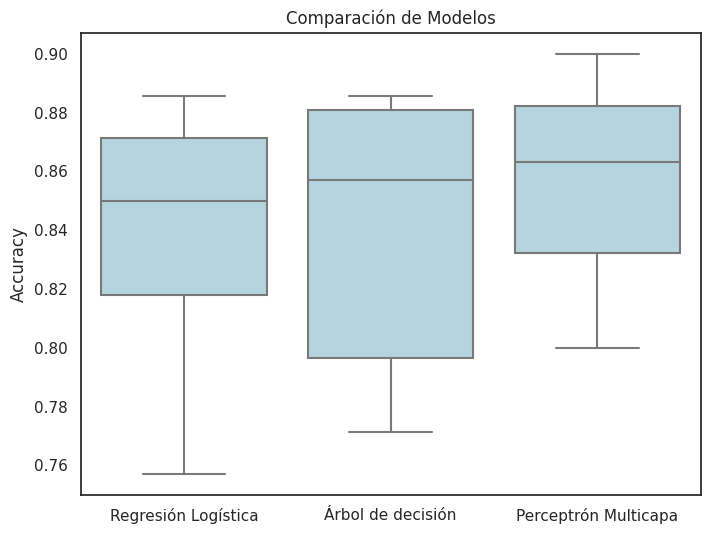

In [156]:
# Configurar el estilo de Seaborn (opcional)
sns.set(style="white")

# Crear una figura con Seaborn
plt.figure(figsize=(8, 6))
plt.title('Comparación de Modelos')

# Utilizar Seaborn para crear un gráfico de caja con los resultados, estableciendo un color específico
sns.boxplot(data=results, color='lightblue')

# Establecer etiquetas en el eje x con los nombres de los modelos
plt.xticks(range(len(names)), names)

# Añadir etiqueta en el eje y
plt.ylabel('Accuracy')

# Mostrar la figura
plt.show()


In [115]:
# Lista de tuplas con las métricas de cada modelo
compare_models = [('Regresión Logística', train_acc_LR, test_acc_LR, scores_LR.mean(), precision_score_LR, recall_score_LR, f1_score_LR,''),
          ('Árbol de decisión', train_acc_DT, test_acc_DT, scores_DT.mean(), precision_score_DT, recall_score_DT, f1_score_DT, ''),
          ('Perceptrón Multicapa', train_acc_MLP, test_acc_MLP, scores_MLP.mean(), precision_score_MLP, recall_score_MLP, f1_score_MLP,'')
         ]

In [153]:
# Crear DataFrame
predict = pd.DataFrame(data = compare_models, columns=['Modelo', 'Accuracy entrenamiento', 'Accuracy validación', 'Accuracy promedio validación cruzada','Precisión', 'Recall', 'F1', 'Description'])
# Seleccionar todas las columnas excepto 'Description'
predict = predict.loc[:, predict.columns != 'Description']
# Aplicar el estilo con el fondo degradado
predict.style.background_gradient(cmap='YlGn')

,Modelo,Accuracy entrenamiento,Accuracy validación,Accuracy promedio validación cruzada,Precisión,Recall,F1
0,Regresión Logística,0.854077,0.845714,0.845569,0.854167,0.863158,0.858639
1,Árbol de decisión,0.885551,0.840000,0.835569,0.860215,0.842105,0.851064
2,Perceptrón Multicapa,0.864092,0.840000,0.852712,0.831683,0.884211,0.857143


<Axes: title={'center': 'Regresión Logística'}>

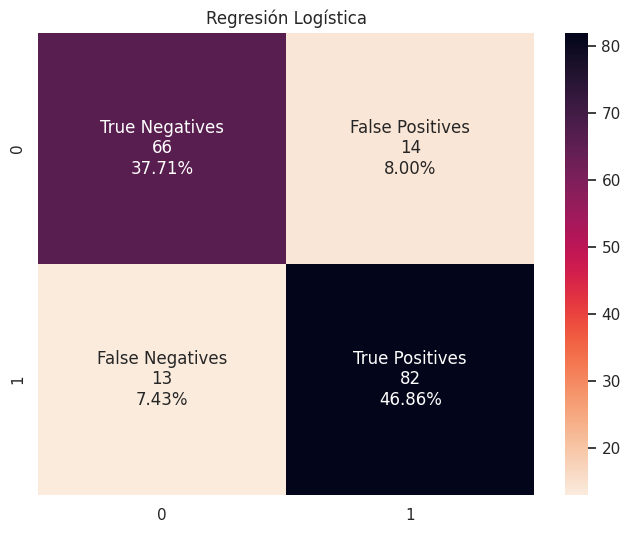

In [154]:
# Importar la matriz de confusión de scikit-learn
conf_matrix_RF = confusion_matrix(y_test, y_test_pred_LR)

# Crear una figura para mostrar la matriz de confusión con un tamaño específico
plt.figure(figsize=(8, 6))

# Agregar un título a la figura
plt.title('Regresión Logística')

# Definir nombres de los grupos para la matriz de confusión
group_names = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']

# Convertir los valores en la matriz de confusión a cadenas formateadas sin decimales
group_counts = ['{0:0.0f}'.format(value) for value in conf_matrix_RF.flatten()]

# Calcular los porcentajes de los valores en la matriz de confusión
group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix_RF.flatten() / np.sum(conf_matrix_RF)]

# Crear etiquetas que contienen información de los grupos, conteos y porcentajes
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

# Reorganizar las etiquetas en un formato de matriz de 2x2
labels = np.asarray(labels).reshape(2, 2)

# Crear un mapa de calor (heatmap) de la matriz de confusión con etiquetas
sns.heatmap(conf_matrix_RF, annot=labels, fmt='', cmap="rocket_r")

<Axes: title={'center': 'Árbol de decisión'}>

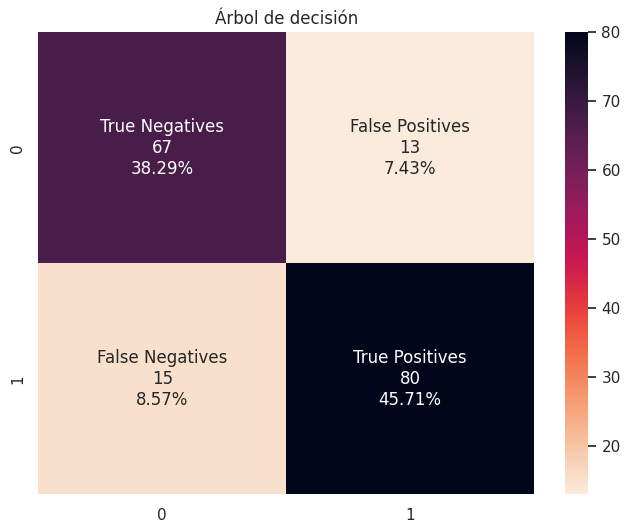

In [118]:
# Importar la matriz de confusión de scikit-learn
conf_matrix_RF = confusion_matrix(y_test, y_test_pred_DT)

# Crear una figura para mostrar la matriz de confusión con un tamaño específico
plt.figure(figsize=(8, 6))

# Agregar un título a la figura
plt.title('Árbol de decisión')

# Definir nombres de los grupos para la matriz de confusión
group_names = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']

# Convertir los valores en la matriz de confusión a cadenas formateadas sin decimales
group_counts = ['{0:0.0f}'.format(value) for value in conf_matrix_RF.flatten()]

# Calcular los porcentajes de los valores en la matriz de confusión
group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix_RF.flatten() / np.sum(conf_matrix_RF)]

# Crear etiquetas que contienen información de los grupos, conteos y porcentajes
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

# Reorganizar las etiquetas en un formato de matriz de 2x2
labels = np.asarray(labels).reshape(2, 2)

# Crear un mapa de calor (heatmap) de la matriz de confusión con etiquetas
sns.heatmap(conf_matrix_RF, annot=labels, fmt='', cmap="rocket_r")

<Axes: title={'center': 'Perceptrón Multicapa'}>

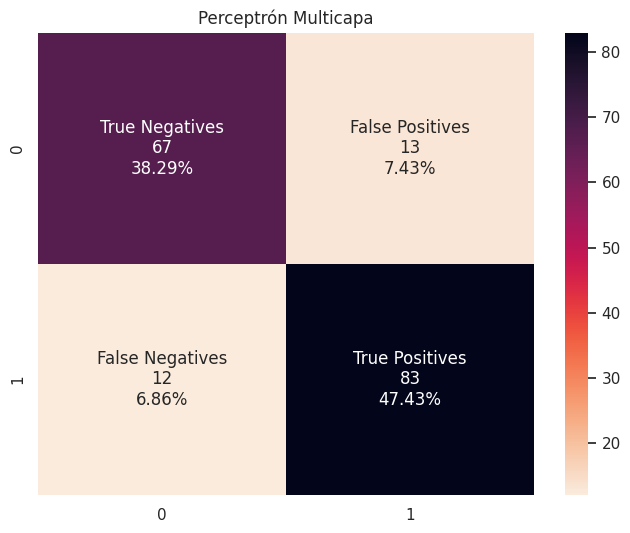

In [ ]:
# Importar la matriz de confusión de scikit-learn
conf_matrix_RF = confusion_matrix(y_test, y_test_pred_MLP)

# Crear una figura para mostrar la matriz de confusión con un tamaño específico
plt.figure(figsize=(8, 6))

# Agregar un título a la figura
plt.title('Perceptrón Multicapa')

# Definir nombres de los grupos para la matriz de confusión
group_names = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']

# Convertir los valores en la matriz de confusión a cadenas formateadas sin decimales
group_counts = ['{0:0.0f}'.format(value) for value in conf_matrix_RF.flatten()]

# Calcular los porcentajes de los valores en la matriz de confusión
group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix_RF.flatten() / np.sum(conf_matrix_RF)]

# Crear etiquetas que contienen información de los grupos, conteos y porcentajes
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

# Reorganizar las etiquetas en un formato de matriz de 2x2
labels = np.asarray(labels).reshape(2, 2)

# Crear un mapa de calor (heatmap) de la matriz de confusión con etiquetas
sns.heatmap(conf_matrix_RF, annot=labels, fmt='', cmap="rocket_r")